In [198]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [199]:
def iteration(y0,dy0,x,h):
    f = lambda x,y,dy: (1/x**2 + (math.e/math.log(x))*y**2-y*math.exp(dy))**1/2
    y = y0 + h*dy0
    dy = dy0 + h*f(x,y0,dy0)
    return y, dy

In [200]:
def solve_(y0,dy0,x0,x1):
    points = np.arange(3,7.5,0.5)
    solutions = []
    y = []; x = x0
    h = 10**(-3)
    while x < x1:
        y0, dy0 = iteration(y0,dy0,x,h)
        y.append(y0)
        for i in points:
            if abs(x-i) < h/2: 
                solutions.append(y0)
        x += h
    return y0, y, solutions

In [201]:
Y0 = 2*math.e**2
h = 10**(-3)
F = lambda alpha: solve_(math.e,alpha,math.e,math.e**2)[0] - Y0
dF = lambda alpha, h: (F(alpha + h)-F(alpha))/h

In [202]:
alpha0 = (math.e-1)/2*math.e
alpha = alpha0
print(solve_(math.e,alpha,math.e,math.e**2)[0])
f = F(alpha0)
print(f)
alpha = alpha0
while(abs(f) > 10**(-12)):
    alpha = alpha - F(alpha)/dF(alpha,h)
    f = F(alpha)

14.789698453643895
0.01158625578259631


In [203]:
solution,y, solutions = solve_(math.e,alpha,math.e,math.e**2)
print(solution)

14.778112197861262


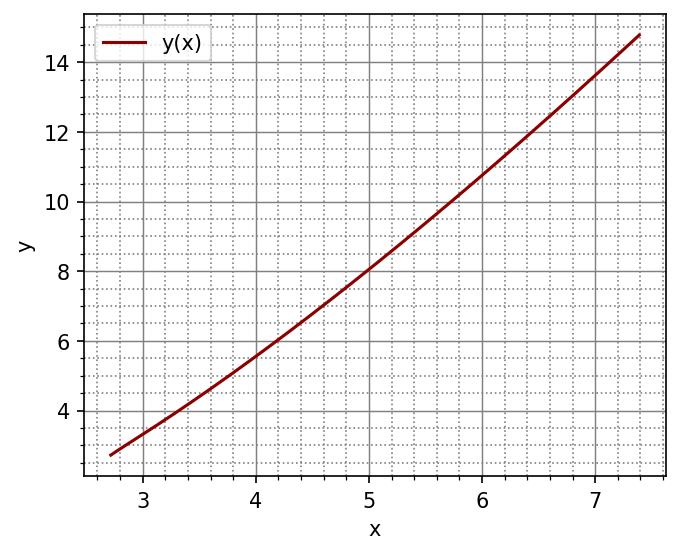

In [204]:
x = np.linspace(math.e,math.e**2,len(y))
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.plot(x,y, color = "darkred",label = "y(x)")
plt.minorticks_on()
plt.grid(which='major',
            color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
plt.xlabel('x')
plt.ylabel('y')
ax.legend()

In [206]:
points = np.arange(3,7.5,0.5)
df = pd.DataFrame({"x": points, "y": solutions})
print(df)

     x          y
0  3.0   3.315953
1  3.5   4.399151
2  4.0   5.555957
3  4.5   6.776735
4  5.0   8.053936
5  5.5   9.381685
6  6.0  10.755253
7  6.5  12.170742
8  7.0  13.624873
